There are different types of callback and a The "LearningRateScheduler callback" allows you to define a function to call that takes the epoch number as an argument and returns the learning rate to use in stochastic gradient descent.

In [2]:
#Lets create a quick dataset to play with.
from sklearn.datasets import make_circles
n_samples=100
x,y=make_circles(n_samples,noise=0.03,random_state=42)
#Split the dataset into traning and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#Model Creation
import tensorflow as tf
#set random seed
tf.random.set_seed=42
#Model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
#Complite the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])


In [3]:
# initialize a learning rate callback
lr_scheduler =tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4*10**(epoch/20))
#fit the model
history=model.fit(X_train,y_train,epochs=100,callbacks=[lr_scheduler])

Epoch 1/100
3/3 [==============================] - 1s 10ms/step - loss: 0.6991 - accuracy: 0.4500 - lr: 1.0000e-04
Epoch 2/100
3/3 [==============================] - 0s 8ms/step - loss: 0.6991 - accuracy: 0.5000 - lr: 1.1220e-04
Epoch 3/100
3/3 [==============================] - 0s 7ms/step - loss: 0.6990 - accuracy: 0.4875 - lr: 1.2589e-04
Epoch 4/100
3/3 [==============================] - 0s 6ms/step - loss: 0.6989 - accuracy: 0.5000 - lr: 1.4125e-04
Epoch 5/100
3/3 [==============================] - 0s 6ms/step - loss: 0.6988 - accuracy: 0.4875 - lr: 1.5849e-04
Epoch 6/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6987 - accuracy: 0.4875 - lr: 1.7783e-04
Epoch 7/100
3/3 [==============================] - 0s 6ms/step - loss: 0.6986 - accuracy: 0.4875 - lr: 1.9953e-04
Epoch 8/100
3/3 [==============================] - 0s 7ms/step - loss: 0.6985 - accuracy: 0.4750 - lr: 2.2387e-04
Epoch 9/100
3/3 [==============================] - 0s 6ms/step - loss: 0.6983 - accurac

<Axes: xlabel='epochs'>

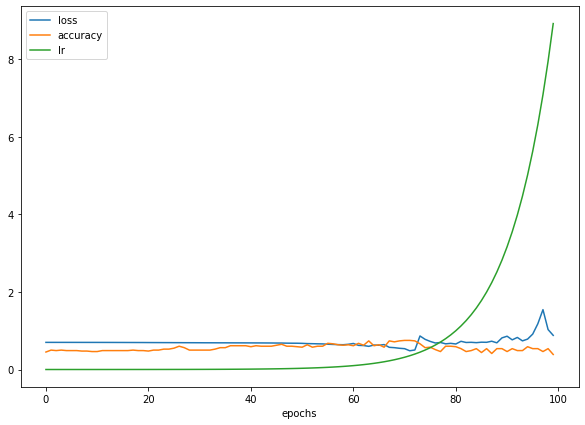

In [4]:
#plot the history
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(10,7),xlabel="epochs")

The ideal learning rate is the value where the accuray increases faster or the loss value decreas fast. For a more clear understanding lets plot the cure of loss vs learning rate

Text(0.5, 1.0, 'Learning rate vs Loss')

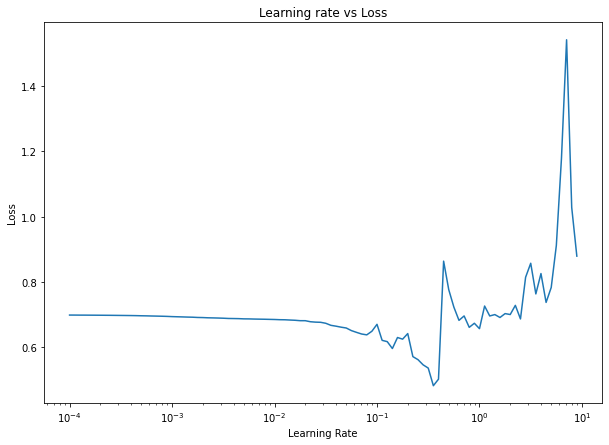

In [5]:
#lr vs loss
plt.figure(figsize=(10,7))
plt.semilogx(history.history["lr"],history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss")

We could see that loss changes in faster rate when learning rate is between .01 to .1. So we can conclude that the ideal learning rate will be 0.01